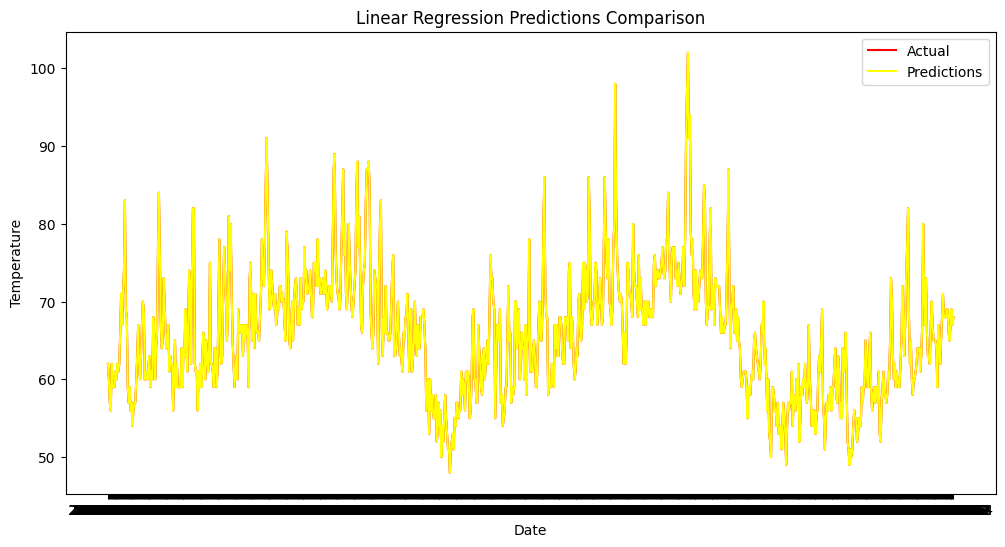

Linear Regression Mean Squared Error: 1.873544649899903e-28


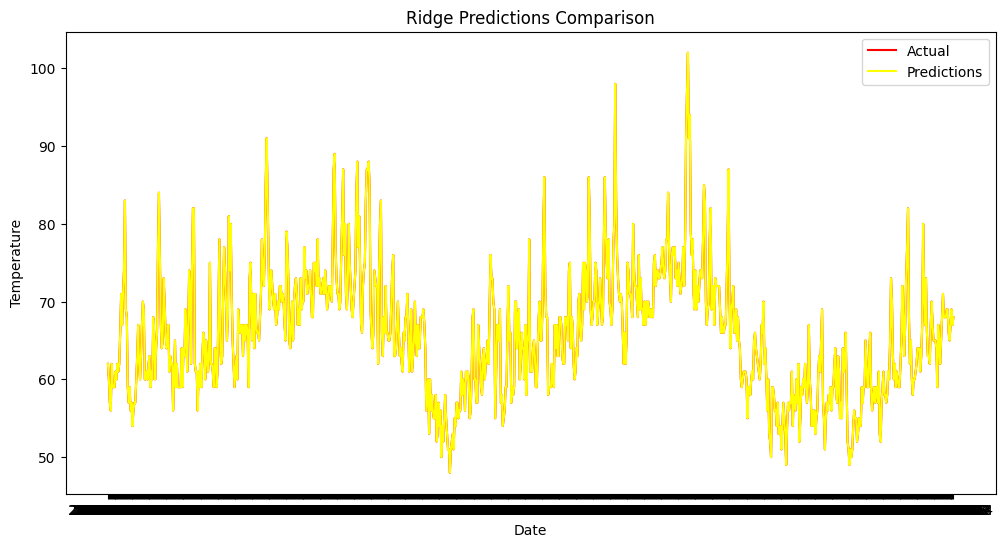

Ridge Mean Squared Error: 9.579080230861201e-13


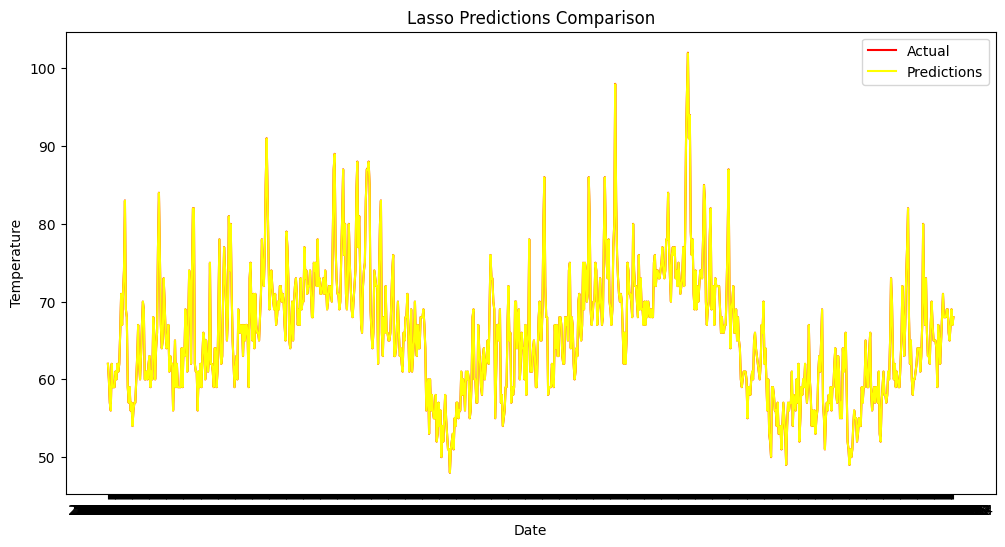

Lasso Mean Squared Error: 0.00012633588846035736


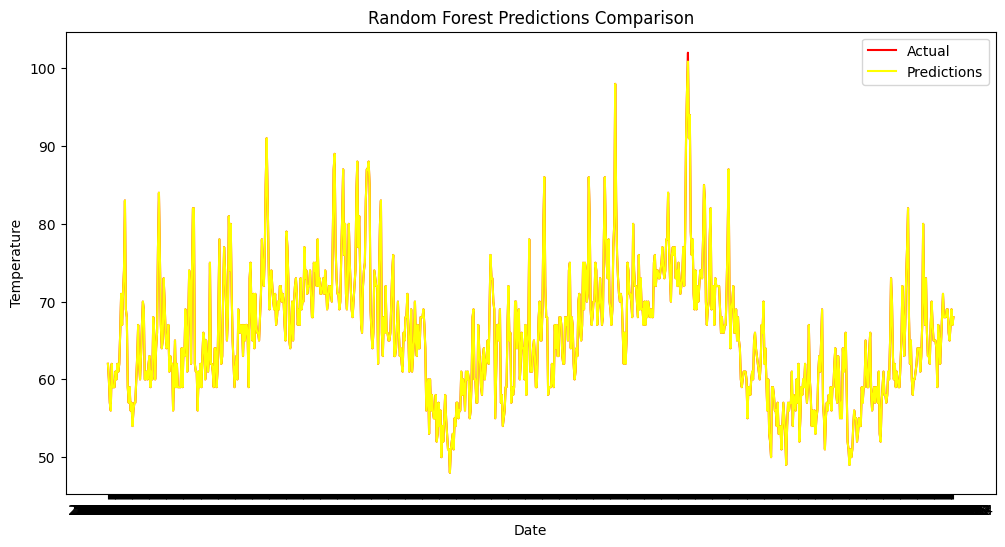

Random Forest Mean Squared Error: 0.0014506696428571446


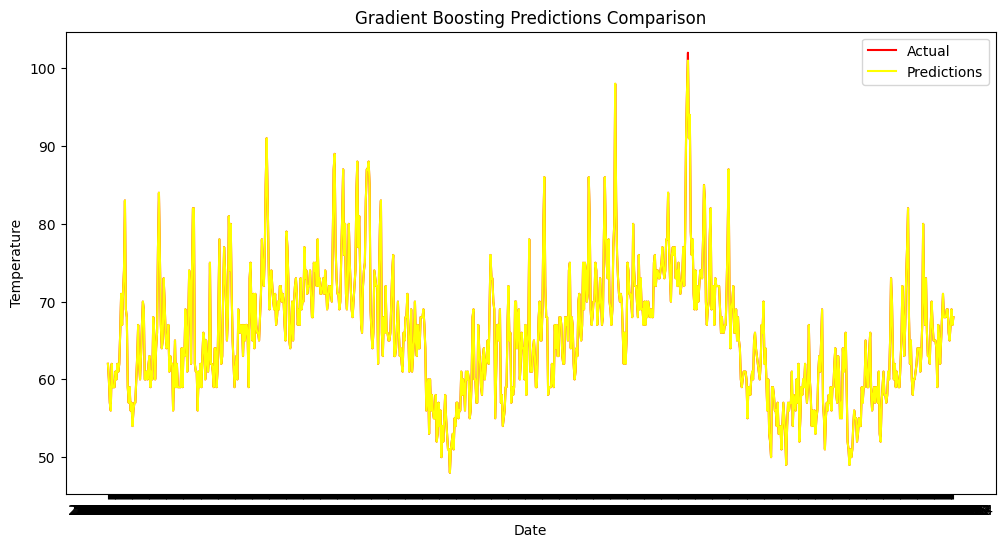

Gradient Boosting Mean Squared Error: 0.0011490674334677185


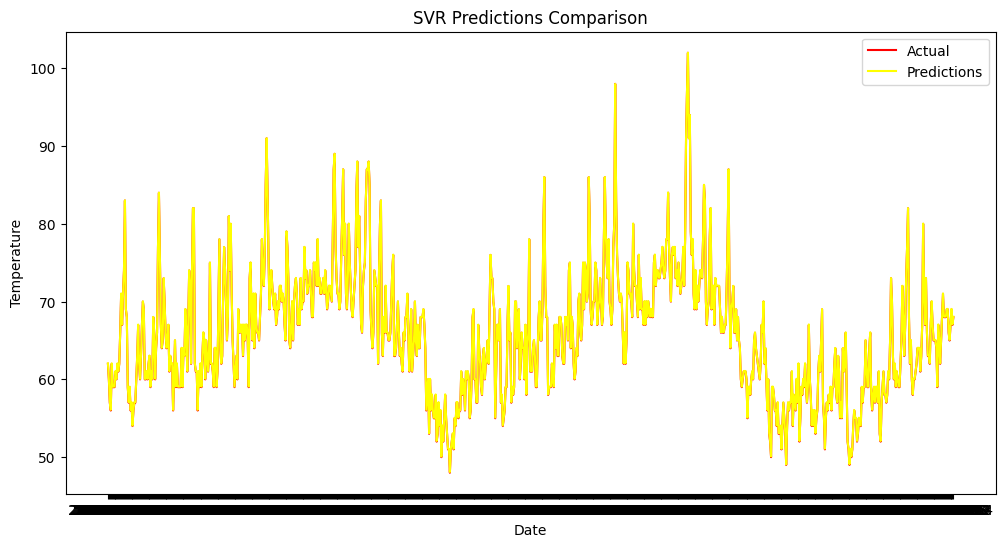

SVR Mean Squared Error: 0.00366063346221517
Linear Regression Mean Squared Error: 1.873544649899903e-26
Ridge Mean Squared Error: 9.579080230861201e-11
Lasso Mean Squared Error: 0.012633588846035736
Random Forest Mean Squared Error: 0.14506696428571447
Gradient Boosting Mean Squared Error: 0.11490674334677184
SVR Mean Squared Error: 0.36606334622151704


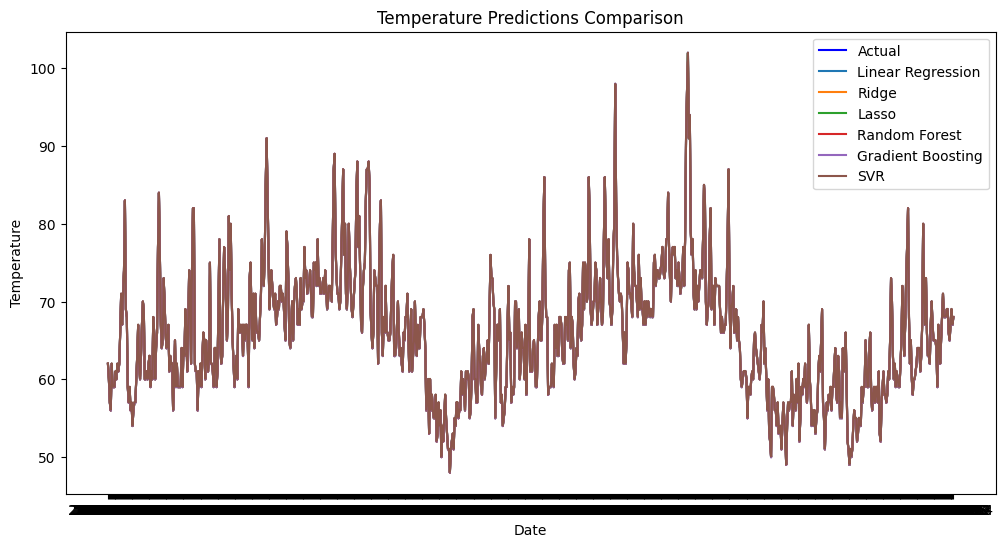

In [6]:
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
def load_data(filename):
    data = pd.read_csv(filename, index_col="DATE")
    return data

# Preprocess data
def preprocess_data(data):
    core_weather = data[["PRCP", "TMAX", "TMIN"]].copy()
    core_weather.columns = ["precip", "temp_max", "temp_min"]
    core_weather["precip"] = core_weather["precip"].fillna(0)
    core_weather = core_weather.fillna(method="ffill")
    return core_weather

# Train and evaluate models
def train_evaluate_model(model, train_features, train_target, test_features, test_target):
    model.fit(train_features, train_target)
    predictions = model.predict(test_features)
    mse = mean_squared_error(test_target, predictions)
    return predictions, mse

# Visualize predictions
def visualize_predictions(actual, predictions, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, color ="RED",label="Actual")
    plt.plot(actual.index, predictions,color="Yellow", label="Predictions")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title(f"{model_name} Predictions Comparison")
    plt.legend()
    plt.show()

def main():
    filename = "local_weather till 18_06.csv"
    data = load_data(filename)
    processed_data = preprocess_data(data)

    predictors = ["precip", "temp_max", "temp_min"]
    target_column = "temp_max"

    train_cutoff = "2020-12-31"
    train_data = processed_data.loc[:train_cutoff]
    test_data = processed_data.loc[train_cutoff:]

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(alpha=0.1),
        "Lasso": Lasso(alpha=0.1),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=0),
        "SVR": SVR(kernel='linear')
    }

    for model_name, model in models.items():
        predictions, mse = train_evaluate_model(
            model, 
            train_data[predictors], train_data[target_column], 
            test_data[predictors], test_data[target_column]
        )
        visualize_predictions(test_data[target_column], predictions, model_name)
        print(f"{model_name} Mean Squared Error:", mse)
    all_predictions = pd.DataFrame(index=test_data.index, columns=models.keys())

    for model_name, model in models.items():
        predictions, mse = train_evaluate_model(
            model, 
            train_data[predictors], train_data[target_column], 
            test_data[predictors], test_data[target_column]
        )
        all_predictions[model_name] = predictions

        print(f"{model_name} Mean Squared Error:", mse)

    # Visualize Predictions of all models
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data[target_column],color="Blue", label="Actual")
    all_predictions.plot(ax=plt.gca())
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title("Temperature Predictions Comparison")
    plt.legend()
    plt.show()
if __name__ == "__main__":
    main()
